<a href="https://colab.research.google.com/github/juansokil/Deep_Learning/blob/master/GenderPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL GENDER PREDICTION

In [0]:
import keras
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Dense, Activation, Dropout, Flatten, Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Activation
from keras.layers import Conv2D, AveragePooling2D
from keras.models import Model, Sequential
from keras import metrics

Using TensorFlow backend.


In [0]:
#VGG-Face model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#pre-trained weights of vgg-face model. 
#you can find it here: https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view?usp=sharing
#related blog post: https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/
model.load_weights('./models/vgg_face_weights.h5')

In [0]:
classes = 2 #man woman
print("number of output classes: ",classes)

#freeze all layers of VGG-Face except last 7 one
for layer in model.layers[:-7]:
    layer.trainable = False

base_model_output = Sequential()
base_model_output = Convolution2D(classes, (1, 1), name='predictions')(model.layers[-4].output)
base_model_output = Flatten()(base_model_output)
base_model_output = Activation('softmax')(base_model_output)

gender_model = Model(inputs=model.input, outputs=base_model_output)


number of output classes:  2


In [0]:
#pre-trained weights for gender prediction: https://drive.google.com/file/d/1wUXRVlbsni2FN9-jkS_f4UTUrm1bRLyk/view?usp=sharing
gender_model.load_weights("./models/gender_model_weights.h5")

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

def loadImage(filepath):
    test_img = image.load_img(filepath, target_size=(224, 224))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis = 0)
    test_img /= 255
    return test_img

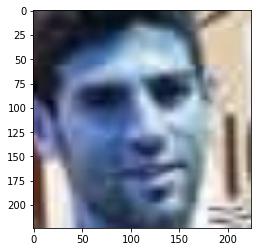

gender:  Man


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import glob
path = glob.glob("/mnt/c/Source/deep_learning/partidos_politicos/train/crop_mauriciomacri/*.jpg")
path


picture = '/mnt/c/Source/deep_learning/partidos_politicos/train/crop_mauriciomacri/crop_(367, 83, 51, 51).jpg'
img = image.load_img(picture)#, target_size=(224, 224))
plt.imshow(img)
plt.show()

prediction = gender_model.predict(loadImage(picture))
prediction
gender = "Man" if np.argmax(prediction) == 1 else "Woman"
print("gender: ", gender)



In [0]:
path = glob.glob("/mnt/c/Source/deep_learning/partidos_politicos/train/crop_mauriciomacri/*.jpg")
path

#picture = '/mnt/c/Source/deep_learning/partidos_politicos/train/crop_mauriciomacri/crop_(367, 83, 51, 51).jpg'
#img = image.load_img(picture)#, target_size=(224, 224))
#plt.imshow(img)
#plt.show()
genero_macri = []
for picture in path:
    #img = image.load_img(picture)#, target_size=(224, 224))
    #plt.imshow(img)
    #plt.show()
    prediction = gender_model.predict(loadImage(picture))
    prediction
    gender = "Man" if np.argmax(prediction) == 1 else "Woman"
    print("gender: ", gender)
    genero_macri.append(gender)


In [0]:
path = glob.glob("/mnt/c/Source/deep_learning/partidos_politicos/train/crop_cristinafkirchner/*.jpg")
path

#picture = '/mnt/c/Source/deep_learning/partidos_politicos/train/crop_mauriciomacri/crop_(367, 83, 51, 51).jpg'
#img = image.load_img(picture)#, target_size=(224, 224))
#plt.imshow(img)
#plt.show()
genero_cristina = []
for picture in path:
    #img = image.load_img(picture)#, target_size=(224, 224))
    #plt.imshow(img)
    #plt.show()
    prediction = gender_model.predict(loadImage(picture))
    prediction
    gender = "Man" if np.argmax(prediction) == 1 else "Woman"
    print("gender: ", gender)
    genero_cristina.append(gender)

In [0]:
path = glob.glob("/mnt/c/Source/deep_learning/partidos_politicos/train/crop_nico_del_cano/*.jpg")
path

#picture = '/mnt/c/Source/deep_learning/partidos_politicos/train/crop_mauriciomacri/crop_(367, 83, 51, 51).jpg'
#img = image.load_img(picture)#, target_size=(224, 224))
#plt.imshow(img)
#plt.show()
genero_nico = []
for picture in path:
    #img = image.load_img(picture)#, target_size=(224, 224))
    #plt.imshow(img)
    #plt.show()
    prediction = gender_model.predict(loadImage(picture))
    prediction
    gender = "Man" if np.argmax(prediction) == 1 else "Woman"
    print("gender: ", gender)
    genero_nico.append(gender)

In [0]:
from collections import Counter
print(Counter(genero_macri))
print(Counter(genero_cristina))
print(Counter(genero_nico))


Counter({'Man': 2180, 'Woman': 581})
Counter({'Man': 1531, 'Woman': 785})
Counter({'Man': 1860, 'Woman': 490})
